In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import random

In [2]:
df = pd.read_csv("California_housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Number of rows and columns

In [3]:
print("Number of columns :",len(df.columns))
print("Number of rows :",len(df.index))

Number of columns : 9
Number of rows : 20640


# summary of the dataset

In [4]:
df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
Housing_Value    float64
dtype: object

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   Housing_Value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


# statistical description of the features

In [6]:
print(df.describe(include="all"))

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  Housing_Value  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min        0.692308     32.5

# check for the duplicate values

In [7]:
# print("The number of duplicate values:", )
print(len(df["Housing_Value"]))
print(len(df["Housing_Value"].unique()))

20640
3842


# Show the top 5 and the last 5 rows of the data

In [8]:
print(df.head(5))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Housing_Value  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [9]:
print(df.tail(5))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Housing_Value  
20635    -121.09          0.781  
20636    -121.21          0.771  
20637    -121.22          0.923  
20638    -121.32          0.847  
20639    -121.24          0.894  


# check for the null values, and handle them if any

In [10]:
missing_data = df.isnull()
missing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [11]:
# to count nulls in our dataframe
# figuring out number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    # value_counts: counts the number of true and false
    # true means value is missing
    # false means value is not missing  
    print("")

MedInc
False    20640
Name: MedInc, dtype: int64

HouseAge
False    20640
Name: HouseAge, dtype: int64

AveRooms
False    20640
Name: AveRooms, dtype: int64

AveBedrms
False    20640
Name: AveBedrms, dtype: int64

Population
False    20640
Name: Population, dtype: int64

AveOccup
False    20640
Name: AveOccup, dtype: int64

Latitude
False    20640
Name: Latitude, dtype: int64

Longitude
False    20640
Name: Longitude, dtype: int64

Housing_Value
False    20640
Name: Housing_Value, dtype: int64



## Hence no missing values. Moreover, df.info() also shows the null and non null values

# Data visualization

### Visualize the Latitude and Longitude using the Population as size

In [12]:
df[["Latitude","Longitude","Population"]]

,Latitude,Longitude,Population
0,37.88,-122.23,322.0
1,37.86,-122.22,2401.0
2,37.85,-122.24,496.0
3,37.85,-122.25,558.0
4,37.85,-122.25,565.0
...,...,...,...
20635,39.48,-121.09,845.0
20636,39.49,-121.21,356.0
20637,39.43,-121.22,1007.0
20638,39.43,-121.32,741.0


### Plot the distribution of all the variables as histograms

<AxesSubplot:ylabel='Frequency'>

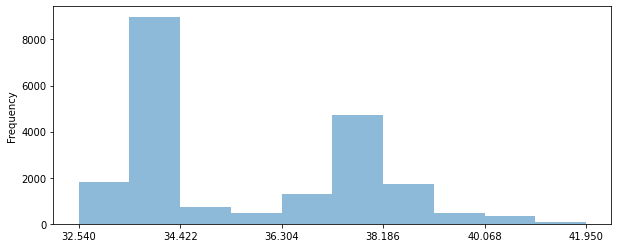

In [13]:
fig = plt.figure(figsize=(10,4))
# axis = []
# ax1 = fig.add_subplot(3,3,1)
# for i in range(1,len(df.columns)+1):
#     ax = fig.add_subplot(3,3,i)
counts,bin_edges=np.histogram(df["Latitude"],5)
# 5 is number of bins
# print(counts) #frequency count
# print(bin_edges) # bins range
df["Latitude"].plot(kind="hist",xticks=bin_edges,alpha=0.5)

### Correlations between variables as heatmap

In [14]:
df[["Latitude","Housing_Value"]].corr()

,Latitude,Housing_Value
Latitude,1.00000,-0.14416
Housing_Value,-0.14416,1.00000


In [15]:
from scipy import stats
cefficicent,p_value = stats.pearsonr(df["Latitude"],df["Housing_Value"])
print(cefficicent,p_value)

-0.1441602768746582 2.9398592907531826e-96


In [16]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Housing_Value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
df.corr().style.background_gradient(cmap="coolwarm")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Housing_Value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

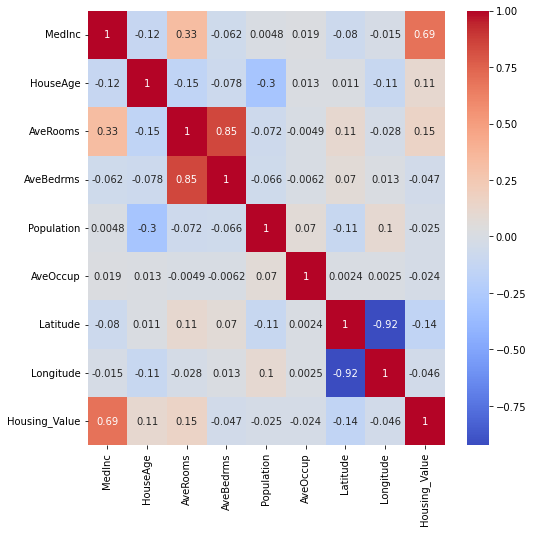

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

### Analyze the results between target and other features (Hint: Pair plot)

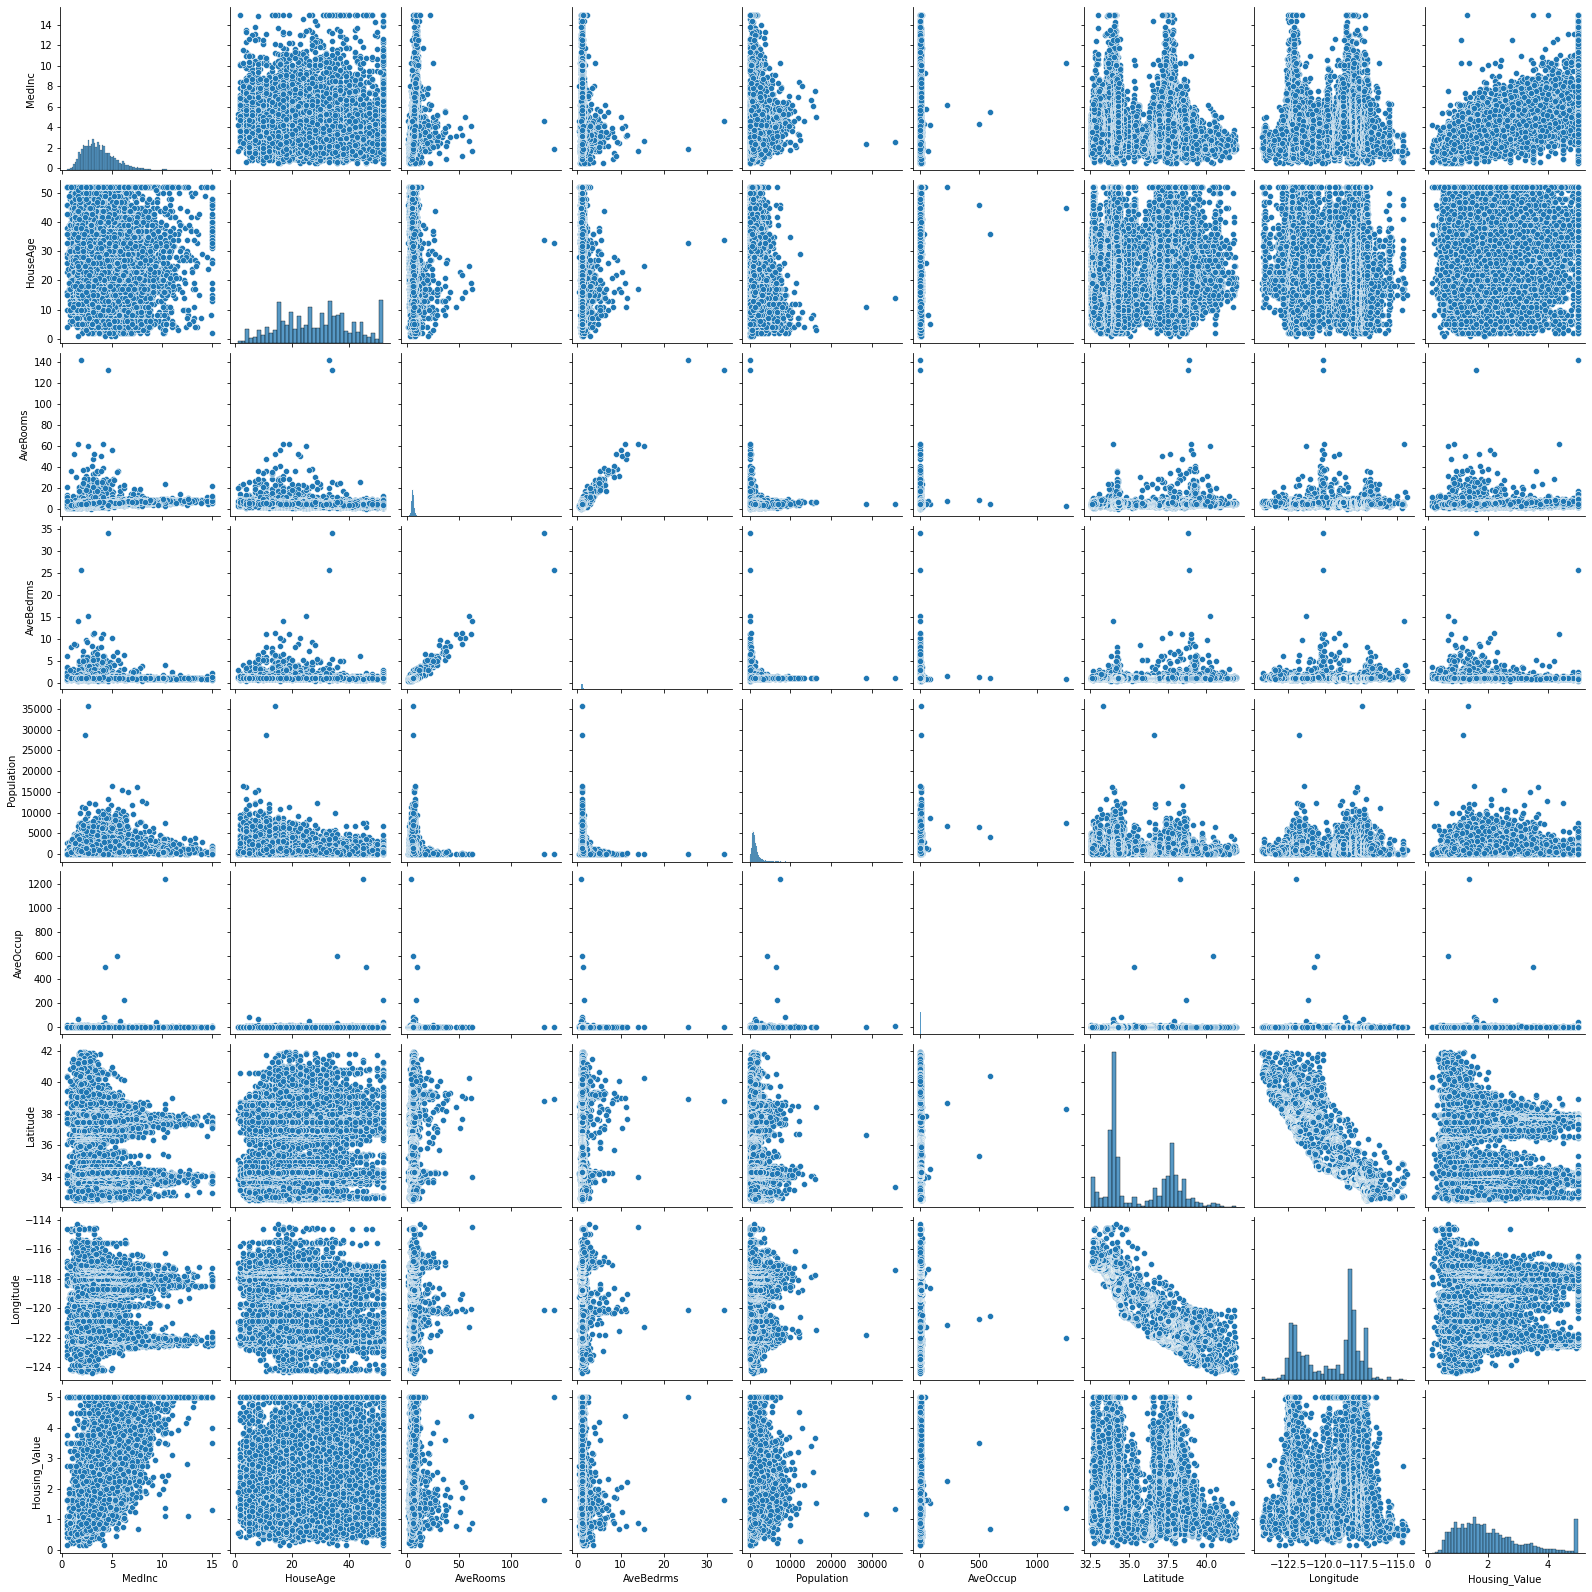

In [19]:
sns.pairplot(df)

# Data Preparation

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Create possible new features based on the existing data

In [21]:
df["bedrooms_per_room"] = df["AveBedrms"] / df["AveRooms"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value,bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096


### Identify the features, target from the given set of attributes and split the data into train, test

### Housing value is the target variable

In [22]:
x_data = df.drop("Housing_Value",axis=1)
y_data = df["Housing_Value"]

In [23]:
y_data.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Housing_Value, dtype: float64

In [24]:
x_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.172096


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train_,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_data)
scaler.mean_

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02,
        2.13074517e-01])

In [27]:
scaler.scale_

array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00,
       5.80220845e-02])

In [28]:
x_data_scaled = scaler.transform(x_data)
print(x_data_scaled.mean(axis=0))

[ 6.60969987e-17  5.50808322e-18  9.36374148e-17 -1.01899540e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15
 -4.35138575e-16]


In [29]:
x_data_scaled.std(axis =0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
new_df = pd.DataFrame(x_data_scaled)
new_df

,0,1,2,3,4,5,6,7,8
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,-1.145833
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,-0.987175
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,-1.440115
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,-0.493194
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,-0.706259
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.199064
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.036771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.036167
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.117506


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform=sc.fit_transform(x_data)
new_df_1 = pd.DataFrame(X_transform)
new_df_1

,0,1,2,3,4,5,6,7,8
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,-1.145833
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,-0.987175
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,-1.440115
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,-0.493194
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,-0.706259
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.199064
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.036771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.036167
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.117506


# Exercise 4: Find the best fit line using Gradient descent and visualize the results

### write a function to return predicted(y), when inputs are : x, weight and intercept

In [39]:
# y = mx + b
# “m” is the slope and “b” is bias. 
# “m” as weight and “b” as intercept.
def predicted_y(x,weight,intercept):
    y_lst = []
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)

### write a function to return linear loss, when inputs are : y_true and y_predicted

In [34]:
def mse_cost_function(y_true,y_predicted):
    number_of_records = len(y_true)
    summation = 0
    for i in range(number_of_records):
        summation += (y_true[i]-y_predicted[i])**2
        return (1/number_of_records)*summation

### write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted

In [55]:
def der_wrt_weight(x,y_true,y_predicted):
    summation = 0
    number_of_records = len(y_true)
    for i in range(number_of_records):
        summation += x[i]*(y_true[i] - y_predicted[i])
    return (-2/number_of_records)*summation

### write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted

In [38]:
def der_wrt_bias(y_true,y_predicted):
    summation = 0
    number_of_records = len(y_true)
    for i in range(number_of_records):
        summation += y_true[i] - y_predicted[i]
    return (-2/number_of_records)*summation

### write a function to perform gradient descent, when inputs are : x and y

In [57]:
# x_new = x_old - (learning_rate)(derivative of loss function at x_old)
def gradient_descent(x,y):
    # initial_weight or slope or x value or feature value
    weight = x_data_scaled[6]
    # initial_intercept
    intercept = 0
    learning_rate = 0.001
    linear_loss = []
    epoch = 1000
    for i in range(epoch):
        y_predicted = predicted_y(x,weight,intercept)
        weight = weight - learning_rate * der_wrt_weight(x,y,y_predicted) # update weight
        intercept = intercept - learning_rate * der_wrt_bias(y,y_predicted) # update bias
        linear_loss.append(mse_cost_function(y,y_predicted))
    #visualize
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("Number of epoch")
    plt.ylabel("loss")
    plt.title('Loss vs Number of epoch')
    plt.show()
    return weight, intercept

In [52]:
x_data_scaled[6]

array([-0.11136631,  1.85618152, -0.2009177 , -0.3066332 , -0.29271158,
       -0.0907249 ,  1.03382082, -1.33781784, -0.3477143 ])

array([ 1.26249656, -0.08217141, -1.26017555, -1.68850809,  0.68661175,
       -0.15324729, -0.30149428, -1.73115035, -0.95234264])

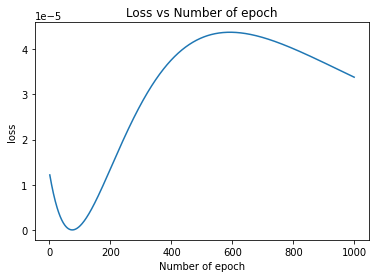

In [59]:
w,b = gradient_descent(x_data_scaled,y_data)

In [ ]:
print(f"weight is {w} and bias is {b}")

In [ ]:
x_data.shape
w = np.random.randn(x_data.shape[1])
w
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target
df_2 = pd.DataFrame(X)
df_2
new_df_546 = pd.DataFrame(Y)
new_df_546